In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("IceCreamData.csv")
df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [6]:
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


<Figure size 600x400 with 0 Axes>

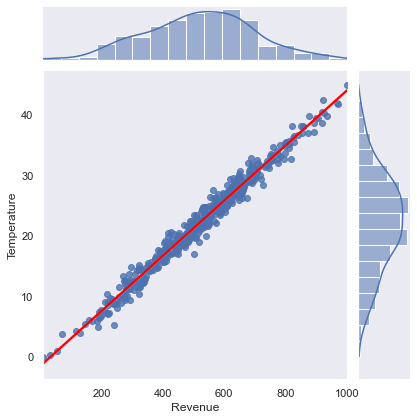

In [17]:
sns.set_theme(style="dark")
plt.figure(dpi = (100))
sns.jointplot(x = df['Revenue'], y = df['Temperature'], kind='reg', line_kws={"color": "red"})

<AxesSubplot:xlabel='Revenue', ylabel='Temperature'>

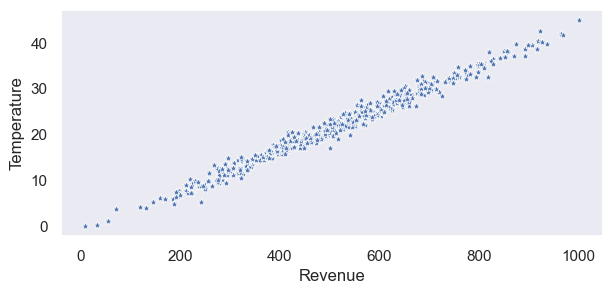

In [15]:
plt.figure(figsize = (7,3), dpi = (100))
sns.scatterplot(x = df['Revenue'], y = df['Temperature'], marker="*")

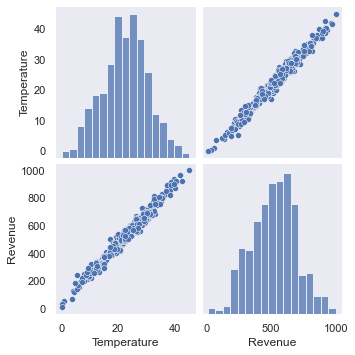

In [16]:
sns.pairplot(df)

In [56]:
from sklearn.model_selection import train_test_split

X = df[['Temperature']]
y = df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 101)

print(f'Total # of sample in whole dataset: {len(X)}')
print("*****"*10)
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Shape of X_train: {X_train.shape}')
print("*****"*10)
print(f'Total # of sample in test dataset: {len(X_test)}')
print(f'Shape of X_test: {X_test.shape}')

Total # of sample in whole dataset: 500
**************************************************
Total # of sample in train dataset: 335
Shape of X_train: (335, 1)
**************************************************
Total # of sample in test dataset: 165
Shape of X_test: (165, 1)


In [57]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept = True)

In [58]:
model.fit(X_train, y_train)

LinearRegression()

In [59]:
pred = model.predict(X_test)

In [60]:
train_score = model.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = model.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: 97.86733638283377
Test score of trained model: 98.18365687594093


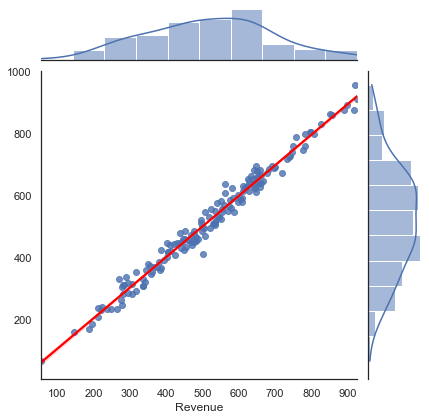

In [61]:
import seaborn as sns
sns.set_theme(style="white")
sns.jointplot(x=y_test, y=pred, kind='reg', line_kws={"color": "red"})